In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import time


df = pd.read_csv("C:/Users/Mayo/Documents/base_datos_2008.csv")
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])]
df= df.head(500000)

In [2]:
#Creamos un arrreglo vacio 
times = []

#Generamos una lista con año, mes, dia y espacio para el dia y minuto aunque no esten registrados 
for i in np.arange(len(df)):
    times.append(datetime.datetime(year = 2008, month = df.loc[i,"Month"], day = df.loc[i,"DayofMonth"]))

In [3]:
#Vemos el no 50,000 de la lista
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

In [4]:
#Añadimos la lista a una nueva columna
df["Time"] = times

In [6]:
#No hacemos que el groupby funcione como un index y aplicamos la media de los dos retrasos, entrada y salida 
data = df.groupby(by=["Time"],as_index=False)["DepDelay", "ArrDelay"].mean()
data.head()
#Tenemos al time como un index

C:\Users\Mayo\AppData\Local\Temp\ipykernel_9092\1048403165.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"],as_index=False)["DepDelay", "ArrDelay"].mean()


,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031


C:\Users\Mayo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

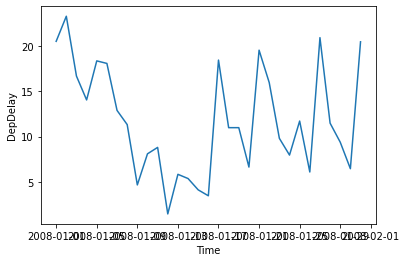

In [8]:
sns.lineplot(data["Time"],data["DepDelay"])

In [10]:
#quitamos la columna con el index
data = df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()
data.head()

C:\Users\Mayo\AppData\Local\Temp\ipykernel_9092\2970790204.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()


,DepDelay,ArrDelay
Time,,
2008-01-01,20.545599,20.999240
2008-01-02,23.324222,22.131194
2008-01-03,16.697759,14.479569
2008-01-04,14.058087,11.851733
2008-01-05,18.381555,17.138031


<AxesSubplot:xlabel='Time'>

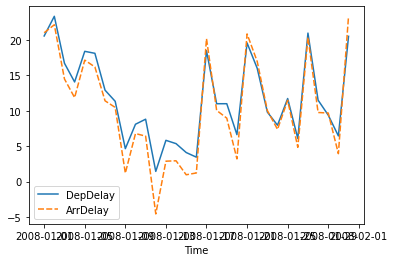

In [11]:
sns.lineplot(data = data)

In [12]:
times = []
#Hacemos la misma lista para el df2
for i in df2.index:
    times.append(datetime.datetime(year = 2008, month = df2.loc[i,"Month"], day = df2.loc[i,"DayofMonth"]))
    
df2["Time"] = times

<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

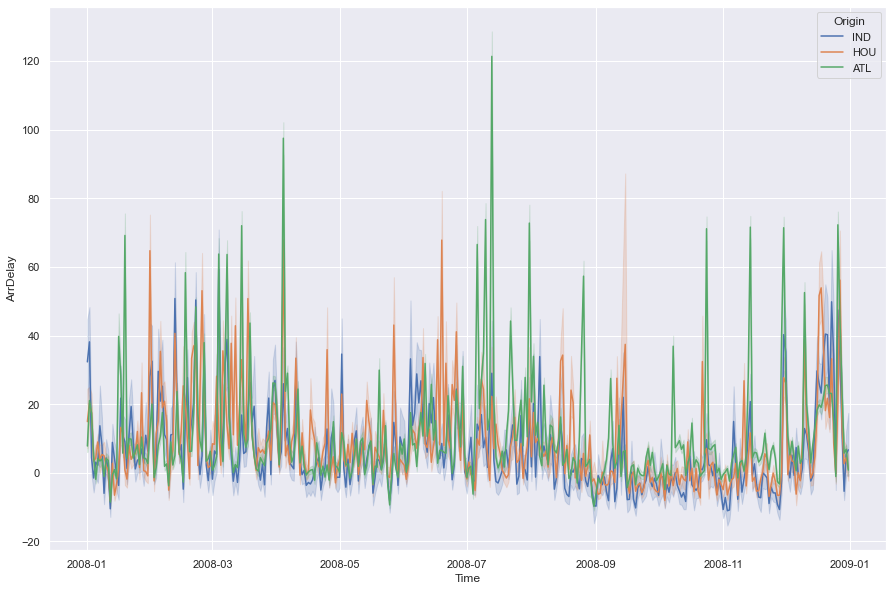

In [13]:
#Ajustamos el margen para que se va mejor 
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Time", y="ArrDelay", hue="Origin", data=df2)
#hue filtra con un dato categorico 